## Spam Detection based on Text Embeddings

### Task

We continue with the task of building a spam detector but using the text embeddings this time. Embeddings are vector representations of text data and are designed to capture the semantic meaning and context of the words or sentences they represent. 

### Data

The dataset has been downloaded for you and is available in the *data* folder.

### Notebook overview

* Load and prepare the data
* Quick analysis of the data
* PCA on embeddings
* Build a spam detector

## Import libraries

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Load and prepare the data

Load the 'email_embeddings.csv' dataset from the data folder. The dataset contains an embedding vector for each email. Each vector is a numerical representation of an email as a whole, and captures its semantic meaning. We use embeddings obtained using the *Gecko* model which can produce 768 dimensional embeddings for English text.

**Task 1**. load the 'email_embeddings.csv' data and check the shape and a few rows of it 

In [204]:
# load email_embeddings.csv file

df = pd.read_csv('data/email_embeddings.csv')

# check the shape of data and a few rows of it
print(df.shape)
df.head()

(5832, 768)


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.012373,-0.018983,-0.015448,0.017502,0.035560,-0.000460,0.033559,-0.013540,-0.019357,0.043482,...,-0.023635,0.044551,0.022994,0.029587,0.011559,-0.008164,-0.017245,-0.009922,-0.034954,-0.039636
1,-0.000592,-0.036461,-0.025587,0.017729,0.031857,-0.045625,0.051302,0.025131,-0.002957,0.040964,...,-0.018732,0.036356,0.004606,0.048945,-0.039095,0.036534,-0.025406,-0.004709,-0.006947,-0.029345
2,-0.015628,-0.032974,-0.017868,0.030587,0.015972,-0.012683,0.016617,-0.008228,-0.026466,0.017005,...,0.020764,0.034141,-0.034710,0.015784,-0.043653,0.021216,0.010660,-0.027863,-0.005670,-0.029882
3,0.033675,-0.025316,-0.006813,0.028282,0.037449,-0.038211,0.043962,0.011977,-0.022668,0.003135,...,0.004263,0.023893,-0.004593,0.034003,-0.013506,0.049029,-0.014022,0.014270,-0.017976,-0.014652
4,0.001591,-0.035304,0.008094,0.017116,0.026043,-0.008375,0.017645,-0.000340,-0.005837,0.022499,...,-0.029826,0.022401,-0.018729,0.050755,-0.040724,0.009831,-0.022889,-0.026048,-0.012297,-0.013357


**Task 2**. load the 'email_text.csv' data and add its 'label' and 'text' columns to the embedding datframe

In [205]:
# load email_text.csv file

df_text = pd.read_csv('data/email_text.csv')

# add the text and label columns to the new dataframe
df['label'] = df_text.label
df['text'] = df_text.text

print(df.shape)
df.head()

(5832, 770)


,0,1,2,3,4,5,6,7,8,9,...,760,761,762,763,764,765,766,767,label,text
0,-0.012373,-0.018983,-0.015448,0.017502,0.035560,-0.000460,0.033559,-0.013540,-0.019357,0.043482,...,0.022994,0.029587,0.011559,-0.008164,-0.017245,-0.009922,-0.034954,-0.039636,1,"Dear Homeowner,\n \nInterest Rates are at thei..."
1,-0.000592,-0.036461,-0.025587,0.017729,0.031857,-0.045625,0.051302,0.025131,-0.002957,0.040964,...,0.004606,0.048945,-0.039095,0.036534,-0.025406,-0.004709,-0.006947,-0.029345,1,ATTENTION: This is a MUST for ALL Computer Use...
2,-0.015628,-0.032974,-0.017868,0.030587,0.015972,-0.012683,0.016617,-0.008228,-0.026466,0.017005,...,-0.034710,0.015784,-0.043653,0.021216,0.010660,-0.027863,-0.005670,-0.029882,1,We dare you...\n Try to find a better annuity!...
3,0.033675,-0.025316,-0.006813,0.028282,0.037449,-0.038211,0.043962,0.011977,-0.022668,0.003135,...,-0.004593,0.034003,-0.013506,0.049029,-0.014022,0.014270,-0.017976,-0.014652,1,IMPORTANT INFORMATION:\n\nThe new domain names...
4,0.001591,-0.035304,0.008094,0.017116,0.026043,-0.008375,0.017645,-0.000340,-0.005837,0.022499,...,-0.018729,0.050755,-0.040724,0.009831,-0.022889,-0.026048,-0.012297,-0.013357,1,This is the bottom line. If you can GIVE AWAY...


## Quick analysis of the data

**Task 3**. check the proportion of spam and non-spam emails. 

Hint: use the value_counts() method on the 'label' column. Check the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

In [206]:
# check proportion of spam and not spam emails

df['label'].value_counts(normalize=True)

0    0.703189
1    0.296811
Name: label, dtype: float64

The ratio is similar to what we saw in the previous notebook. Most emails are not spam.


**Task 4**. check if some of the emails are duplicated and remove them. 

Hint: use the drop_duplicates() method on the 'text' column. Check the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates).

In [207]:
# drop duplicates texts

df.drop_duplicates(subset="text", keep="first", inplace=True)
df.shape

(5807, 770)

**Task 5**. do spam and non-spam emails have similar average embeddings?

Hint: for each email calculate the mean of the 786 embedding dimensions. Then compare the means for spam and non-spam emails, using visualizations e.g. boxplot or violinplot. Check the documentation [here](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Repeat the same process for median or any other statistic you think is relevant.

In [208]:
# calculate the mean and median for each row

df_tmp = pd.DataFrame()
df_tmp['mean'] = df.drop(['label', 'text'],axis=1).mean(axis=1)
df_tmp['median'] = df.drop(['label', 'text'],axis=1).median(axis=1)
df_tmp['label'] = df['label']


# prepare them for plotting
df_tmp = df_tmp.melt(id_vars=['label'], value_vars=['mean','median'], var_name='statistic', value_name='value')
df_tmp

,label,statistic,value
0,1,mean,-0.001909
1,1,mean,-0.000163
2,1,mean,-0.002171
3,1,mean,-0.000878
4,1,mean,-0.000284
...,...,...,...
11609,0,median,0.002059
11610,0,median,0.000215
11611,0,median,0.000396
11612,0,median,-0.000172


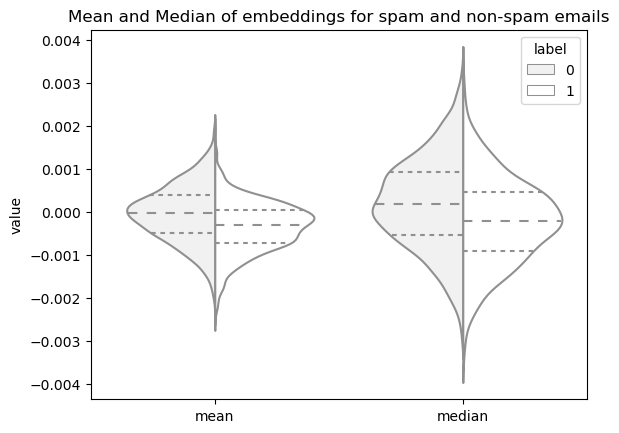

In [209]:
# create a violin plot
sns.violinplot(data=df_tmp, x='statistic', y='value', hue='label', fill=False, color='1', split=True, inner="quart" )
plt.xlabel('')
plt.title('Mean and Median of embeddings for spam and non-spam emails')
plt.show()


The plots shows that embedding vectors have means around zero no matter if the email is spam or not. However, the distribution of mean values of embeddings are not the same for spam and non-spam emails. The quartiles (dashed lines) for spam emails are slightly lower than for non-spam emails. This suggests that the embeddings can be used to distinguish between spam and non-spam emails. The same conclusion can be drawn from the median values of embeddings.

## PCA on embeddings

In the previous task, we collapsed the 786 dimensions of the embeddings into a single value by taking the mean or median. We can go a little further and create a more complex representation of the embeddings by using PCA. PCA is a dimensionality reduction technique that can be used to reduce the number of dimensions of a dataset while preserving as much variance as possible. Let's try it.

**Task 6**. 
- Perform PCA on the embeddings to reduce the dimensionality of the data.
- Plot the explained variance ratio against the number of components.
- Plot the first two components of the PCA and color the points based on the email label.

Hint: use the PCA class from the sklearn.decomposition module. Check the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

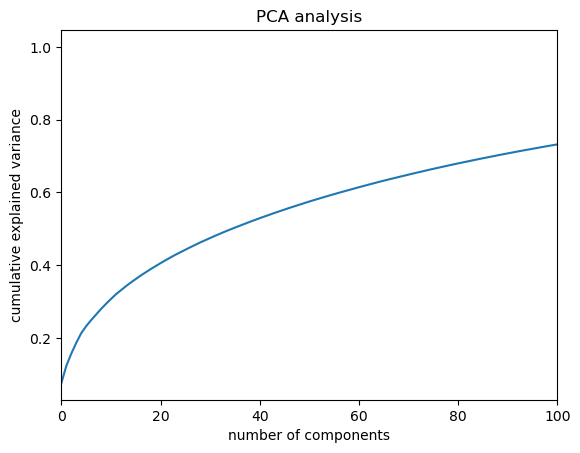

In [210]:
# perform PCA on embeddings to reduce the dimensionality of the data

pca = PCA(n_components=None)
pcs = pca.fit_transform(df.iloc[:, :-2])

# show the explained variance ratio versus the number of components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('PCA analysis')
plt.xlim(0, 100)
plt.show()

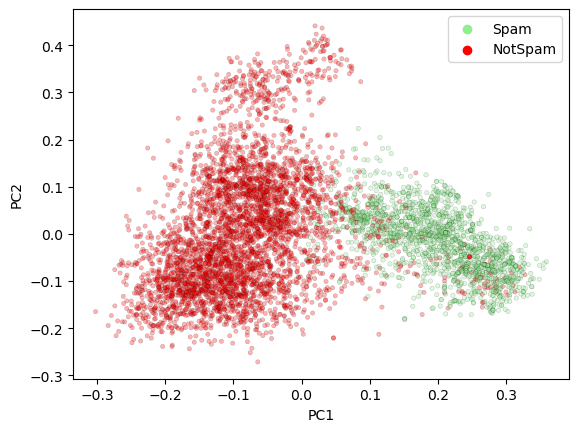

In [211]:
# plot the first two principal components and color the points by the label

label_mapping = {0: 'NotSpam', 1: 'Spam'}
mapped_labels = [label_mapping[label] for label in df['label']]

sns.scatterplot(x=pcs[:, 0], 
                y=pcs[:, 1], 
                hue=mapped_labels, 
                palette=['lightgreen', 'red'], edgecolor='k', alpha=0.3, s=10)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

According to the first plot, the first two components can explain around 10% of the variance in the data which is not a lot. However, the second plot shows that spam and non-spam emails are somewhat separated by the first two components. Emails with similar semantic meaning are clustered together in the 2D space. This suggests that the embeddings can be used to distinguish between spam and non-spam emails. A simple classifier can probably leverage on this property and catch emails with spammish context from the rest.

## Build a spam detector

Let's build a simple classifier to classify spam and non-spam emails. We will use the Logistic Regression classifier which is  a good starting point for text classification tasks.

**Task 6**. 

- Split the data into training (70%) set and testing set (30%)
- Train a Logistic Regression classifier on embeddings 
- Evaluate the classifier on the train and test sets, and report the confusion matrix
- Tune the classifier by changing the regularization parameter and report the confusion matrix again
- Show the text of the spam emails that were misclassified as non-spam emails

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [213]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-2], df['label'], 
                                    test_size = 0.3, 
                                    stratify=df["label"],
                                    random_state = 0)

# show counts of spam and not spam emails in the training set and test set
display(y_train.value_counts(normalize=True), 
        y_test.value_counts(normalize=True))

0    0.705955
1    0.294045
Name: label, dtype: float64

0    0.706254
1    0.293746
Name: label, dtype: float64

In [214]:
lr_model = LogisticRegression(solver="liblinear", class_weight="balanced", random_state=None)

lr_model.fit(X_train, y_train)
y_pred_tr = lr_model.predict(X_train)
y_pred = lr_model.predict(X_test)
 
print(f"Train Accuracy: {accuracy_score(y_train, y_pred_tr).round(3)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred).round(3)}")

confusion_matrix(y_test, y_pred, normalize='true').round(2)

Train Accuracy: 0.977
Test Accuracy: 0.981


array([[0.98, 0.02],
       [0.01, 0.99]])

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [220]:
# create a pipeline with PCA and Logistic Regression

pca = PCA(n_components=0.90)
lr = LogisticRegression(solver="lbfgs", class_weight="balanced", random_state=2, max_iter=1000, )
pipe = Pipeline(steps=[('pca', pca), ('lr', lr)])

# create a parameter grid
param_grid = {'lr__C': np.logspace(-1, 4, 20),}

# tune hyperparameters C using GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, )

# fit the model
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=0.9)),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=1000,
                                                           random_state=2))]),
             param_grid={'lr__C': array([1.00000000e-01, 1.83298071e-01, 3.35981829e-01, 6.15848211e-01,
       1.12883789e+00, 2.06913808e+00, 3.79269019e+00, 6.95192796e+00,
       1.27427499e+01, 2.33572147e+01, 4.28133240e+01, 7.84759970e+01,
       1.43844989e+02, 2.63665090e+02, 4.83293024e+02, 8.85866790e+02,
       1.62377674e+03, 2.97635144e+03, 5.45559478e+03, 1.00000000e+04])},
             return_train_score=True)

In [221]:
# show table of results 
results = pd.DataFrame(grid.cv_results_)
results[['param_lr__C', 'mean_test_score', 'mean_train_score']].sort_values(by='mean_test_score', ascending=False).head()

,param_lr__C,mean_test_score,mean_train_score
9,23.357215,0.988435,0.992126
12,143.844989,0.987943,0.997232
10,42.813324,0.987697,0.993725
13,263.66509,0.987206,0.998339
8,12.74275,0.987205,0.990588


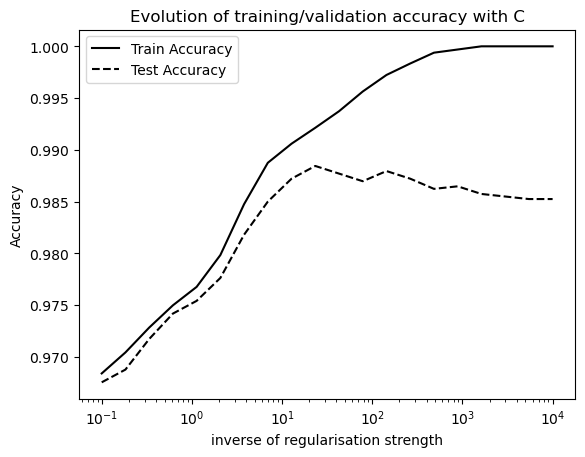

In [222]:
# plotting train and test accuracy versus C
plt.plot(results['param_lr__C'], results['mean_train_score'], label='Train Accuracy', color='k')
plt.plot(results['param_lr__C'], results['mean_test_score'], label='Test Accuracy', linestyle='--', color='k')

plt.xscale('log')
plt.xlabel('inverse of regularisation strength')
plt.ylabel('Accuracy')
plt.title("Evolution of training/validation accuracy with C")
plt.legend()
plt.show()

In [223]:
# show confusion matrix on test data 

y_pred = grid.predict(X_test)
confusion_matrix(y_test, y_pred, normalize='true').round(2)

array([[0.99, 0.01],
       [0.01, 0.99]])

In [224]:
confusion_matrix(y_test, y_pred)

array([[1222,    9],
       [   5,  507]])

In [199]:
# show the text of the spam emails that were misclassified

df_test = df.loc[X_test.index]
df_test['predicted'] = y_pred
df_test['correct']   = df_test['label'] == df_test['predicted']

df_test[(df_test['correct'] == False) & (df_test['label'] == 1)]['text']

1167    Aren't Asian Pacfic Americans (APAs) accorded ...
1136    --DeathToSpamDeathToSpamDeathToSpam--\n\n\n---...
194     Sent e-mail message   \n \nFrom: enenkio@webtv...
1811    TVPredictions.com Newsletter (August 7, 2002)\...
1236    Reply From EnenKio\nThe following message was ...
Name: text, dtype: object